<a href="https://colab.research.google.com/github/julianovale/optimization_metaheuristics_python/blob/master/0001_simulated_annealing_continuous_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulated annealing continuos problem

Função objetivo: Função de Himmelblau

Min Z = ((x^2)+y-11)^2+(x+(y^2)-7)^2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
np.seterr(divide="ignore") # ignora a mensagem de erro de divisão por zero

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
# parâmetros iniciais
x = 2 # x inicial
y = 1 # y inicial

In [4]:
# função objetivo
z = ((x**2)+y-11)**2+(x+(y**2)-7)**2

In [5]:
print("O x inicial é: %0.3f" %x)
print("O y inicial é: %0.3f" %y)
print("O z inicial é: %0.3f" %z)

O x inicial é: 2.000
O y inicial é: 1.000
O z inicial é: 52.000


In [6]:
# hiperparâmetros
T0 = 1000 # temperatura "temp."
temp_for_plot = T0 # para plotagem
M = 300 # quantas vezes você quer diminuir a temperatura
N = 15 # quantas vezes você quer procurar na vizinhança
alpha = 0.85 # por quanto você quer diminuir a temperatura.
             # quando você aumenta m (minúsculo) em 1
k = 0.1 # ajuda você a reduzir o tamanho do passo (um multiplicador)

In [7]:
# para a plotagem
temp = [] # uma lista vazia para armazenar as temperaturas para uma plotagem
obj_val = [] # para plottar o valores objetos alcançados a cada 'm'


momento do início: 2021-02-10 12:57:14.019587
tempo gasto de processamento: 0:00:00.032270

O x final é: 3.001
O y final é: 2.000
O z final é: 0.000

--------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


(1000.0, 0.0)

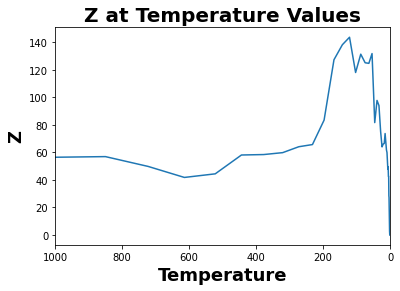

In [8]:
momento_inicio = datetime.now() 
for i in range(M): # passo M
  for j in range(N): # passo N
    # para a variável de decisão x
    rand_num_x_1 = np.random.rand() # aumenta ou diminui x?
    rand_num_x_2 = np.random.rand() # por quanto?
    if rand_num_x_1 >= 0.5:
      step_size_x = k * rand_num_x_2 # aumenta
    else:
      step_size_x = -k * rand_num_x_2 # diminui
    # para a variável de decisão y
    rand_num_y_1 = np.random.rand() # aumenta ou diminui y?
    rand_num_y_2 = np.random.rand() # por quanto?
    if rand_num_y_1 >= 0.5:
      step_size_y = k * rand_num_y_2 # aumenta
    else:
      step_size_y = -k * rand_num_y_2 # diminui
    # criando valores temporários de x e y: antes de acatá-lo preciso testar
    x_temporary = x + step_size_x # atualiza x temporário
    y_temporary = y + step_size_y # atualiza y temporário
    # o possível movimento com os valores temporários:
    obj_val_possible = ((x_temporary**2)+y_temporary-11)**2+(x_temporary+(y_temporary**2)-7)**2
    # os valores atuais:
    obj_val_current = ((x**2)+y-11)**2+(x+(y**2)-7)**2
    # no caso da solução temporária ser pior, preciso verificar se vou acatá-la ou não:
    rand_num = np.random.rand()
    # a formula abaixo vai nos dizer, caso a solução temporária seja pior, se vou acatá-la ou não:
    # quanto mais próximo do final da busca (mais baixa a temperatura T0), menos provável de aceitar uma solução pior,
    # porque é mais provável que o número aleatório seja maior
    formula = 1/(np.exp((obj_val_possible - obj_val_current)/T0))
    # antes de usar a fórmula acima para a decisão, entretanto, é necessário testar a solução temporária, pois, caso
    # ela seja melhor que a atual, será acatada de imediato.
    if obj_val_possible <= obj_val_current: # <= porque é um problema de minimização
      x = x_temporary
      y = y_temporary
    elif rand_num <= formula: # se a solução temporária é pior que a solução atual, será acatada mesmo sendo pior
      x = x_temporary
      y = y_temporary   
    else: 
      x = x
      y = y
  temp.append(T0) # anexa a temperatura para fim de plotagem
  obj_val.append(obj_val_current) # anexa o valor da função objetiva para fim de plotagem 
  T0 = alpha * T0 # quando rodo um certo m, preciso baixar a temperatura pelo fator alpha antes de continuar

print()
print("momento do início:", momento_inicio)
print("tempo gasto de processamento:", datetime.now() - momento_inicio)
print()
print("O x final é: %0.3f" %x)
print("O y final é: %0.3f" %y)
print("O z final é: %0.3f" % obj_val_current)
print()
print('--------------------------------------')

plt.plot(temp, obj_val)
plt.title("Z at Temperature Values", fontsize = 20, fontweight = 'bold')
plt.xlabel("Temperature", fontsize = 18, fontweight = 'bold')
plt.ylabel("Z", fontsize = 18, fontweight = 'bold')
plt.xlim(temp_for_plot, 0)